In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 20})

# Load MetroBike "Trips" Dataframe

In [2]:
trips = pd.read_csv('./data/data_austintexas_gov/Austin_MetroBike_Trips.csv') 

/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
trips.head()

,Trip ID,Membership Type,Bicycle ID,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year
0,9900285854,Annual (San Antonio B-cycle),207.0,10/26/2014,13:12:00,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,10.0,2014.0
1,9900285855,24-Hour Kiosk (Austin B-cycle),969.0,10/26/2014,13:12:00,2498.0,Convention Center / 4th St. @ MetroRail,2566.0,Pfluger Bridge @ W 2nd Street,58,10.0,2014.0
2,9900285856,Annual Membership (Austin B-cycle),214.0,10/26/2014,13:12:00,2537.0,West & 6th St.,2496.0,8th & Congress,8,10.0,2014.0
3,9900285857,24-Hour Kiosk (Austin B-cycle),745.0,10/26/2014,13:12:00,NaN,Zilker Park at Barton Springs & William Barton...,NaN,Zilker Park at Barton Springs & William Barton...,28,10.0,2014.0
4,9900285858,24-Hour Kiosk (Austin B-cycle),164.0,10/26/2014,13:12:00,2538.0,Bullock Museum @ Congress & MLK,NaN,Convention Center/ 3rd & Trinity,15,10.0,2014.0


In [4]:
# check number of rows/trips
trips.shape[0]

1424786

# Load "Kiosk" Dataframe

In [5]:
kiosk = pd.read_csv('./data/data_austintexas_gov/Austin_MetroBike_Kiosk_Locations.csv') 

In [6]:
kiosk.head()

,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,Footprint Length,Footprint Width,Notes,Council District,Image,Modified Date
0,2570,South Congress & Academy,active,"(30.25226, -97.74854)",1199 S. Congress Ave.,NaN,16752.0,sidewalk,10.0,solar,20.0,7.5,on bulb-out,9,NaN,01/04/2021 12:00:00 AM
1,2571,Red River & 8th Street,active,"(30.26854, -97.73646)",761 Red River St.,NaN,16760.0,sidewalk,13.0,solar,40.0,5.0,on pad built in ROW/easement,9,NaN,01/04/2021 12:00:00 AM
2,2572,Barton Springs Pool,active,"(30.26452, -97.7712)",2200 William Barton Dr.,NaN,16758.0,parkland,13.0,solar,40.0,5.0,NaN,8,NaN,01/04/2021 12:00:00 AM
3,2574,Zilker Park,active,"(30.2659, -97.76822)",Barton Springs Rd,Zilker Park at Barton Springs and William Burt...,16759.0,parkland,17.0,solar,50.0,5.0,parkland at ROW/easement,8,NaN,01/04/2021 12:00:00 AM
4,2575,Riverside @ S. Lamar,active,"(30.26446, -97.75665)",Presented by Austin Parks Foundation,NaN,16736.0,parkland,15.0,solar,45.0,5.0,parkland at ROW/easement,5,NaN,01/04/2021 12:00:00 AM


In [7]:
# check number of rows/kiosk locations
kiosk.shape[0]

98

# Loading Community Survey Dataframe

In [8]:
survey = pd.read_csv('./data/data_austintexas_gov/Community_Survey.csv') 

/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,9,10,12,13,14,15,16,17,18,19,20,21,25,30,31,32,36,37,38,39,42,43,44,62,63,64,65,73,80,83,85,86,87,88,89,90,91,92,93,94,95,96,99,100,104,111,113,114,115,116,117,118,119,123,124,125,126,127,128,129,135,136,137,144,145,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,172,173,189,190,191,192,193,199,200,201,204,205,209,212,213,214,215,216,217,218,219,220,223,233,234,235,236,237,238,239,241,243,244,245,246,247,248,249,250) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
survey.groupby(['Year']).size() 

Year
2015    2060
2016    2099
2017    2215
2018    2261
2019    2049
dtype: int64

In [10]:
survey_2019 = survey.loc[survey['Year'] == 2019]

# Adding Some New Columns

I. Adding "Checkout_Hour" and "Checkout_Min" columns

In [11]:
df_time = trips['Checkout Time']
df_time_split = df_time.str.split(':',n=-1, expand=True)
trips['Checkout_Hour']=pd.to_numeric(df_time_split[0])
trips['Checkout_Min']=pd.to_numeric(df_time_split[1])

Text(0, 0.5, '# of Rides')

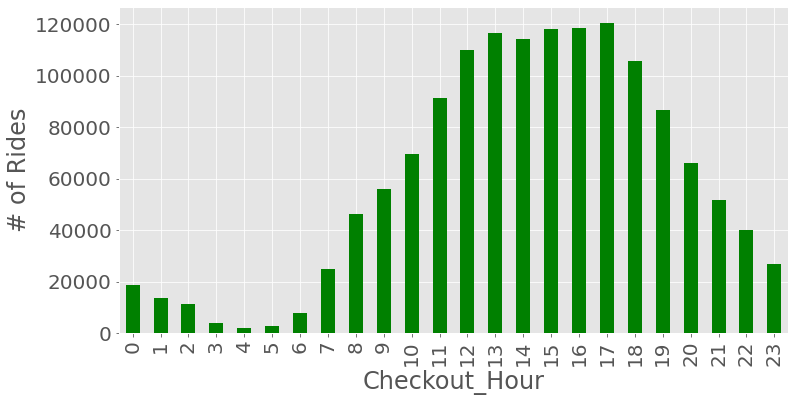

In [12]:
plt.figure(figsize = (12,6))
trips.groupby('Checkout_Hour').size().plot.bar(color = 'g')
plt.ylabel('# of Rides')

In [13]:
trips.groupby('Year').size()

Year
2013.0      1457
2014.0    155703
2015.0    184521
2016.0    184680
2017.0     92118
dtype: int64

The "Year" column is missing 2018-2021

II. Because of this, I will create a new "Year_2" column 

In [14]:
df = trips['Checkout Date']
df_split0 = df.str.split('/', n=- 1, expand=True)
df_split = df_split0.drop(df_split0.columns[[1]], axis=1)

trips["Year_2"] = df_split[2]


III. Also, creating a "Month_2" and "Weekday" columns as well

In [15]:
trips["Month_2"] = df_split[0]

# coverting dates to datetime
ex = pd.to_datetime(trips['Checkout Date'], format="%m/%d/%Y")

trips["Weekday"] = ex.dt.weekday

In [16]:
trips.head()

,Trip ID,Membership Type,Bicycle ID,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year,Checkout_Hour,Checkout_Min,Year_2,Month_2,Weekday
0,9900285854,Annual (San Antonio B-cycle),207.0,10/26/2014,13:12:00,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,10.0,2014.0,13,12,2014,10,6
1,9900285855,24-Hour Kiosk (Austin B-cycle),969.0,10/26/2014,13:12:00,2498.0,Convention Center / 4th St. @ MetroRail,2566.0,Pfluger Bridge @ W 2nd Street,58,10.0,2014.0,13,12,2014,10,6
2,9900285856,Annual Membership (Austin B-cycle),214.0,10/26/2014,13:12:00,2537.0,West & 6th St.,2496.0,8th & Congress,8,10.0,2014.0,13,12,2014,10,6
3,9900285857,24-Hour Kiosk (Austin B-cycle),745.0,10/26/2014,13:12:00,NaN,Zilker Park at Barton Springs & William Barton...,NaN,Zilker Park at Barton Springs & William Barton...,28,10.0,2014.0,13,12,2014,10,6
4,9900285858,24-Hour Kiosk (Austin B-cycle),164.0,10/26/2014,13:12:00,2538.0,Bullock Museum @ Congress & MLK,NaN,Convention Center/ 3rd & Trinity,15,10.0,2014.0,13,12,2014,10,6


IV. Use the kiosk dataframe to create "Checkout Latitude", "Checkout Longitude", "Return Latitude", "Return Longitude" columns in the Trips dataframe

In [17]:
loc_full = kiosk['Location']
loc_split = loc_full.str.split(',', n=- 1, expand=True)
lat_0 = loc_split[0]
lon_0 = loc_split[1]
lat = lat_0.str.replace('(', '')
lon = lon_0.str.replace(')', '')

kiosk["Latitude"] = lat
kiosk["Longitude"] = lon

from math import radians, cos, sin, asin, sqrt

# function "haversine" found at this url
# https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-pointsb

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # Radius of earth in kilometers. Use 6371 for km. Use 3956 for miles. Determines return value units.
    return c * r

result = pd.merge(trips, kiosk, how = "left",
                  left_on="Checkout Kiosk ID", right_on = "Kiosk ID")
result.rename({'Latitude': 'Checkout Lat', 'Longitude': 'Checkout Lon'}, 
              axis=1, inplace=True)
final = pd.merge(trips, kiosk, how = "left",
                  left_on="Return Kiosk ID", right_on = "Kiosk ID")
final.rename({'Latitude': 'Return Lat', 'Longitude': 'Return Lon'}, 
              axis=1, inplace=True)

# Add the columns
trips["Checkout Latitude"] = result["Checkout Lat"].astype(float)
trips["Checkout Longitude"] = result["Checkout Lon"].astype(float)
trips["Return Latitude"] = final["Return Lat"].astype(float)
trips["Return Longitude"] = final["Return Lon"].astype(float)

<ipython-input-17-7cdb63de225d>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  lat = lat_0.str.replace('(', '')
<ipython-input-17-7cdb63de225d>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  lon = lon_0.str.replace(')', '')


V. To the Trips dataframe, add a "Trip_Distance_Miles" (distance between Checkout and Return Kiosks) column 

In [18]:
# Create a vectorized version of haversine
vec_haversine = np.vectorize(haversine)

trips['Trip_Distance_Miles'] = vec_haversine(trips['Checkout Longitude'],trips['Checkout Latitude'], 
             trips['Return Longitude'],trips['Return Latitude'])

In [19]:
trips.head()

,Trip ID,Membership Type,Bicycle ID,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,...,Checkout_Hour,Checkout_Min,Year_2,Month_2,Weekday,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude,Trip_Distance_Miles
0,9900285854,Annual (San Antonio B-cycle),207.0,10/26/2014,13:12:00,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,...,13,12,2014,10,6,30.27041,-97.75046,30.25579,-97.73982,1.192306
1,9900285855,24-Hour Kiosk (Austin B-cycle),969.0,10/26/2014,13:12:00,2498.0,Convention Center / 4th St. @ MetroRail,2566.0,Pfluger Bridge @ W 2nd Street,58,...,13,12,2014,10,6,30.26483,-97.73900,30.26717,-97.75484,0.958320
2,9900285856,Annual Membership (Austin B-cycle),214.0,10/26/2014,13:12:00,2537.0,West & 6th St.,2496.0,8th & Congress,8,...,13,12,2014,10,6,30.27041,-97.75046,30.26980,-97.74186,0.514558
3,9900285857,24-Hour Kiosk (Austin B-cycle),745.0,10/26/2014,13:12:00,NaN,Zilker Park at Barton Springs & William Barton...,NaN,Zilker Park at Barton Springs & William Barton...,28,...,13,12,2014,10,6,NaN,NaN,NaN,NaN,NaN
4,9900285858,24-Hour Kiosk (Austin B-cycle),164.0,10/26/2014,13:12:00,2538.0,Bullock Museum @ Congress & MLK,NaN,Convention Center/ 3rd & Trinity,15,...,13,12,2014,10,6,30.28039,-97.73809,NaN,NaN,NaN


# Removing Some Rows from "trips"

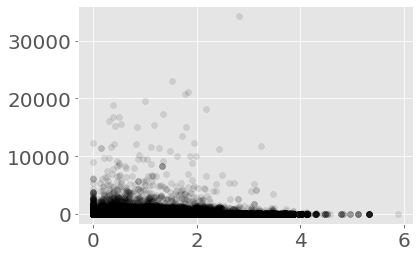

In [20]:
# some of the trips are too long (1440 min) or too short (0 minutues)
# removing these trips (in the next cell)
plt.scatter(trips['Trip_Distance_Miles'], 
           trips['Trip Duration Minutes'], alpha=0.1,color='k')

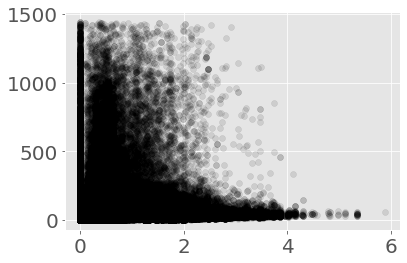

In [21]:
trips = trips[(trips['Trip Duration Minutes']>0) 
      & (trips['Trip Duration Minutes']<1440)]
# replotting
plt.scatter(trips['Trip_Distance_Miles'], 
           trips['Trip Duration Minutes'], alpha=0.1,color='k')

In [22]:
# check number of rows/trips
trips.shape[0]

1402213

In [23]:
trips['dx']= trips['Return Longitude']-trips['Checkout Longitude']
trips['dy']= trips['Return Latitude']-trips['Checkout Latitude']
trips['dy/dx']=trips['dy']/trips['dx']

In [24]:
trips_2017 = trips.loc[trips['Year_2'] == '2017']
trips_2018 = trips.loc[trips['Year_2'] == '2018']
trips_2019 = trips.loc[trips['Year_2'] == '2019']
trips_2020 = trips.loc[trips['Year_2'] == '2020']
trips_2021 = trips.loc[trips['Year_2'] == '2021']
trips_recent = trips[trips['Year_2'].isin(['2017','2018','2019','2020'])]

trips_2017_wkdays = trips_2017.loc[trips_2017['Weekday'].isin([0,1,2,3])]
trips_2018_wkdays = trips_2018.loc[trips_2018['Weekday'].isin([0,1,2,3])]
trips_2019_wkdays = trips_2019.loc[trips_2019['Weekday'].isin([0,1,2,3])]
trips_2020_wkdays = trips_2020.loc[trips_2020['Weekday'].isin([0,1,2,3])]
trips_2021_wkdays = trips_2021.loc[trips_2021['Weekday'].isin([0,1,2,3])]

trips_2017_wkends = trips_2017.loc[trips_2017['Weekday'].isin([4,5,6])]
trips_2018_wkends = trips_2018.loc[trips_2018['Weekday'].isin([4,5,6])]
trips_2019_wkends = trips_2019.loc[trips_2019['Weekday'].isin([4,5,6])]
trips_2020_wkends = trips_2020.loc[trips_2020['Weekday'].isin([4,5,6])]
trips_2021_wkends = trips_2021.loc[trips_2021['Weekday'].isin([4,5,6])]

# Add number of rides columns to Kiosks dataframe

In [25]:
all_kiosks = kiosk['Kiosk ID'].unique()
# all_kiosks

In [26]:
ntrips = []
ntrips_2017_wkdays = []
ntrips_2018_wkdays = []
ntrips_2019_wkdays = []
ntrips_2020_wkdays = []
ntrips_2021_wkdays = []
ntrips_2017_wkends = []
ntrips_2018_wkends = []
ntrips_2019_wkends = []
ntrips_2020_wkends = []
ntrips_2021_wkends = []
ntrips_2017 = []
ntrips_2018 = []
ntrips_2019 = []
ntrips_2020 = []
ntrips_2021 = []

for k in all_kiosks:
    ntrips = np.append(ntrips, 
                trips[trips['Checkout Kiosk ID'] == k].size)

    ntrips_2017_wkdays = np.append(ntrips_2017_wkdays, 
                trips_2017_wkdays[trips_2017_wkdays['Checkout Kiosk ID'] == k].size)    
    
    ntrips_2018_wkdays = np.append(ntrips_2018_wkdays, 
                trips_2018_wkdays[trips_2018_wkdays['Checkout Kiosk ID'] == k].size)        
    
    ntrips_2019_wkdays = np.append(ntrips_2019_wkdays, 
                trips_2019_wkdays[trips_2019_wkdays['Checkout Kiosk ID'] == k].size)        
        
    ntrips_2020_wkdays = np.append(ntrips_2020_wkdays, 
                trips_2020_wkdays[trips_2020_wkdays['Checkout Kiosk ID'] == k].size)        
        
    ntrips_2021_wkdays = np.append(ntrips_2021_wkdays, 
                trips_2021_wkdays[trips_2021_wkdays['Checkout Kiosk ID'] == k].size)        
    
    ntrips_2017_wkends = np.append(ntrips_2017_wkends, 
                trips_2017_wkends[trips_2017_wkends['Checkout Kiosk ID'] == k].size)    
    
    ntrips_2018_wkends = np.append(ntrips_2018_wkends, 
                trips_2018_wkends[trips_2018_wkends['Checkout Kiosk ID'] == k].size)        
    
    ntrips_2019_wkends = np.append(ntrips_2019_wkends, 
                trips_2019_wkends[trips_2019_wkends['Checkout Kiosk ID'] == k].size)        
        
    ntrips_2020_wkends = np.append(ntrips_2020_wkends, 
                trips_2020_wkends[trips_2020_wkends['Checkout Kiosk ID'] == k].size)        
        
    ntrips_2021_wkends = np.append(ntrips_2021_wkends, 
                trips_2021_wkends[trips_2021_wkends['Checkout Kiosk ID'] == k].size)        
    
    ntrips_2017 = np.append(ntrips_2017, 
                trips_2017[trips_2017['Checkout Kiosk ID'] == k].size)

    ntrips_2018 = np.append(ntrips_2018, 
                trips_2018[trips_2018['Checkout Kiosk ID'] == k].size)
    
    ntrips_2019 = np.append(ntrips_2019, 
                trips_2019[trips_2019['Checkout Kiosk ID'] == k].size)
    
    ntrips_2020 = np.append(ntrips_2020, 
                trips_2020[trips_2020['Checkout Kiosk ID'] == k].size)
    
    ntrips_2021 = np.append(ntrips_2021, 
                trips_2021[trips_2021['Checkout Kiosk ID'] == k].size)

kiosk['Num_Rides_AllTime'] = ntrips
kiosk['Num_Rides_2017_Wkdays'] = ntrips_2017_wkdays
kiosk['Num_Rides_2018_Wkdays'] = ntrips_2018_wkdays
kiosk['Num_Rides_2019_Wkdays'] = ntrips_2019_wkdays
kiosk['Num_Rides_2020_Wkdays'] = ntrips_2020_wkdays
kiosk['Num_Rides_2021_Wkdays'] = ntrips_2021_wkdays

kiosk['Num_Rides_2017_Wkends'] = ntrips_2017_wkends
kiosk['Num_Rides_2018_Wkends'] = ntrips_2018_wkends
kiosk['Num_Rides_2019_Wkends'] = ntrips_2019_wkends
kiosk['Num_Rides_2020_Wkends'] = ntrips_2020_wkends
kiosk['Num_Rides_2021_Wkends'] = ntrips_2021_wkends
kiosk['Num_Rides_2017'] = ntrips_2017
kiosk['Num_Rides_2018'] = ntrips_2018
kiosk['Num_Rides_2019'] = ntrips_2019
kiosk['Num_Rides_2020'] = ntrips_2020
kiosk['Num_Rides_2021'] = ntrips_2021

In [27]:
trips.groupby('Year_2').size()

Year_2
2013      1431
2014    153161
2015    180299
2016    181963
2017    190606
2018    381742
2019    110181
2020    102186
2021    100644
dtype: int64

In [28]:
kiosk.head()

,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,...,Num_Rides_2017_Wkends,Num_Rides_2018_Wkends,Num_Rides_2019_Wkends,Num_Rides_2020_Wkends,Num_Rides_2021_Wkends,Num_Rides_2017,Num_Rides_2018,Num_Rides_2019,Num_Rides_2020,Num_Rides_2021
0,2570,South Congress & Academy,active,"(30.25226, -97.74854)",1199 S. Congress Ave.,NaN,16752.0,sidewalk,10.0,solar,...,44725.0,31400.0,7325.0,9850.0,10525.0,83900.0,54925.0,13650.0,15975.0,16650.0
1,2571,Red River & 8th Street,active,"(30.26854, -97.73646)",761 Red River St.,NaN,16760.0,sidewalk,13.0,solar,...,35925.0,29125.0,8825.0,9525.0,11600.0,68250.0,54125.0,17775.0,16200.0,21475.0
2,2572,Barton Springs Pool,active,"(30.26452, -97.7712)",2200 William Barton Dr.,NaN,16758.0,parkland,13.0,solar,...,56350.0,45350.0,22325.0,16950.0,15800.0,95600.0,76675.0,40025.0,31575.0,29725.0
3,2574,Zilker Park,active,"(30.2659, -97.76822)",Barton Springs Rd,Zilker Park at Barton Springs and William Burt...,16759.0,parkland,17.0,solar,...,98250.0,78250.0,43000.0,46175.0,41850.0,154175.0,125125.0,69800.0,76575.0,69375.0
4,2575,Riverside @ S. Lamar,active,"(30.26446, -97.75665)",Presented by Austin Parks Foundation,NaN,16736.0,parkland,15.0,solar,...,120975.0,104700.0,55400.0,57325.0,41625.0,210800.0,171925.0,97500.0,100650.0,73825.0


# Save cleaned data into CSV files

In [29]:
trips.to_csv('./data/trips.csv')
kiosk.to_csv('./data/kiosk.csv')
survey_2019.to_csv('./data/survey.csv')

In [30]:
trips_2017.to_csv('./data/trips_2017.csv')
trips_2018.to_csv('./data/trips_2018.csv')
trips_2019.to_csv('./data/trips_2019.csv')
trips_2020.to_csv('./data/trips_2020.csv')
trips_2021.to_csv('./data/trips_2021.csv')
trips_recent.to_csv('./data/trips_recent.csv')